In [1]:
import pytesseract
import cv2 
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform
import imutils
import re
import requests
import numpy as np
import os

from imutils.contours import sort_contours

In [3]:
def mergeResize(img, row=300, col=200):
    IMG_COL = col #66

    # row값에 따른 col값 변경
    IMG_COL = int((row * IMG_COL)/row)

    IMG_ROW = row
    border_v = 0
    border_h = 0

    if (IMG_COL / IMG_ROW) >= (img.shape[0] / img.shape[1]):
        border_v = int((((IMG_COL / IMG_ROW) * img.shape[1]) - img.shape[0]) / 2)
    else:
        border_h = int((((IMG_ROW / IMG_COL) * img.shape[0]) - img.shape[1]) / 2)
    img = cv2.copyMakeBorder(img, top=border_v, bottom=border_v, left=0, right=border_h + border_h, borderType=cv2.BORDER_CONSTANT, value=(255, 255, 255))
    img = cv2.resize(img, (IMG_ROW, IMG_COL))
    return img
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

./comma_won/mini4608169212_L300.jpeg


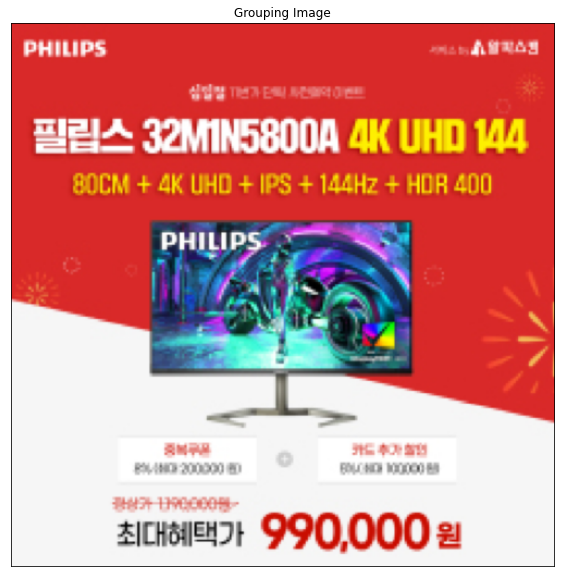

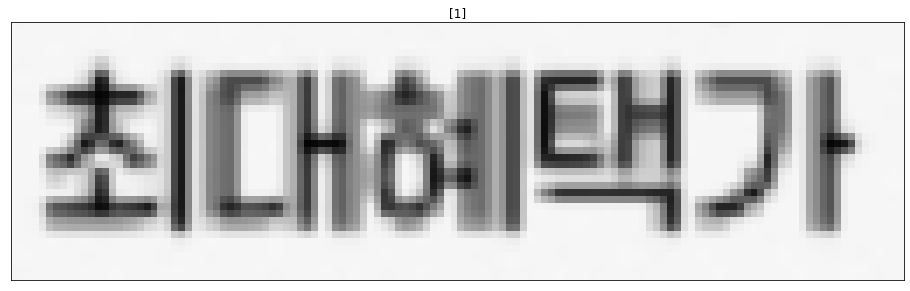

최 대 혜 택 가



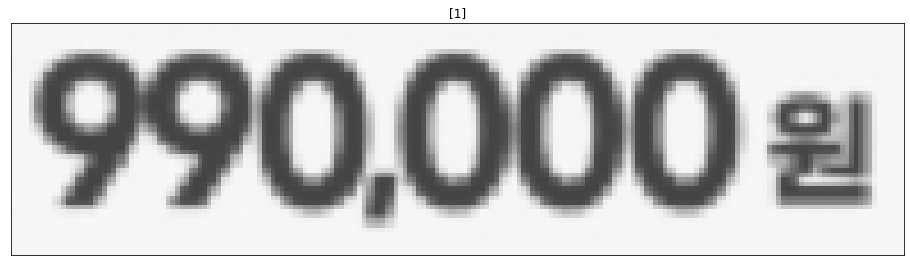

990,000 z



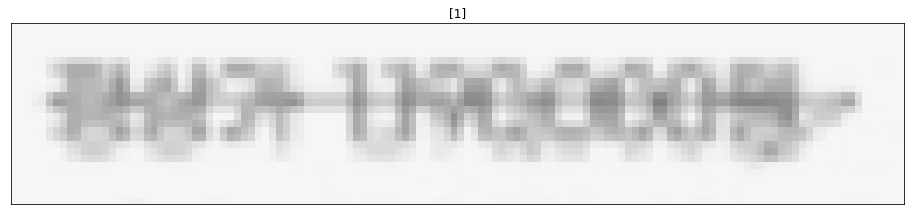

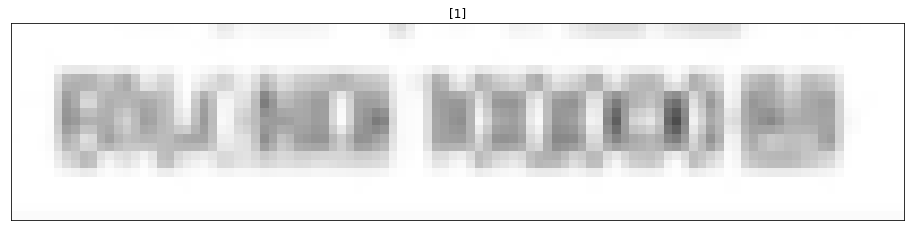

‘OND MeO Ae



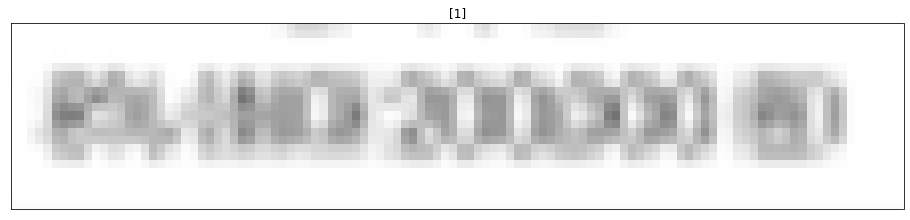

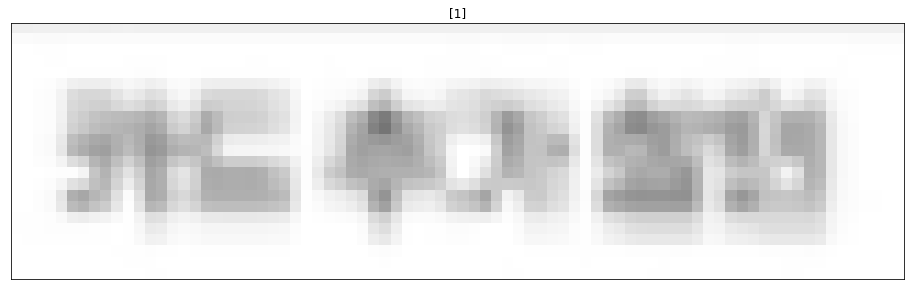

neers



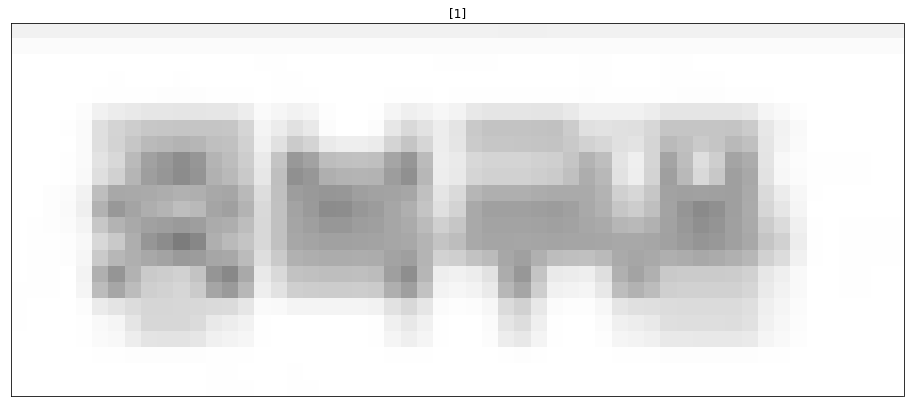

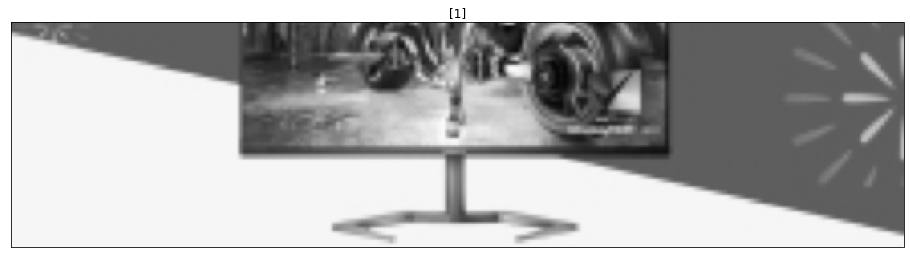

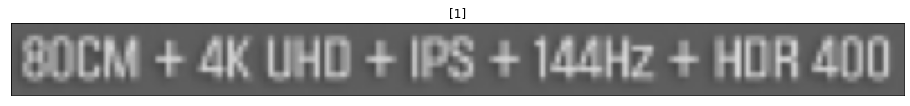

S0CM + 4K UHD + IPS + 144Hz + HOR 400



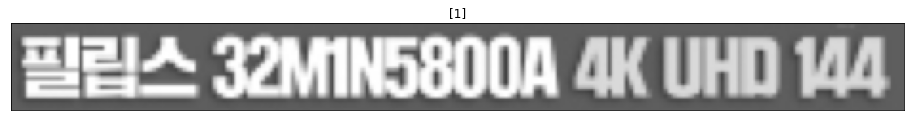

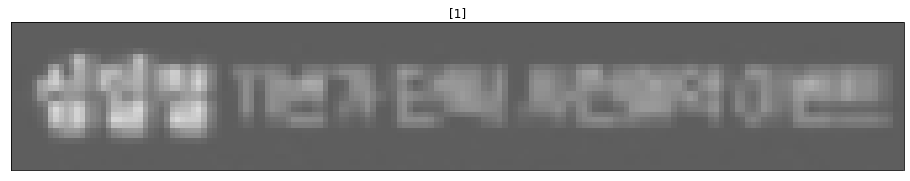

UG 전기 더리 ere oe



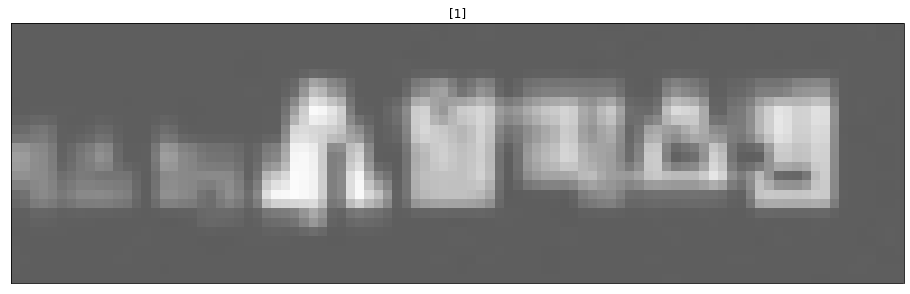

한 기 170



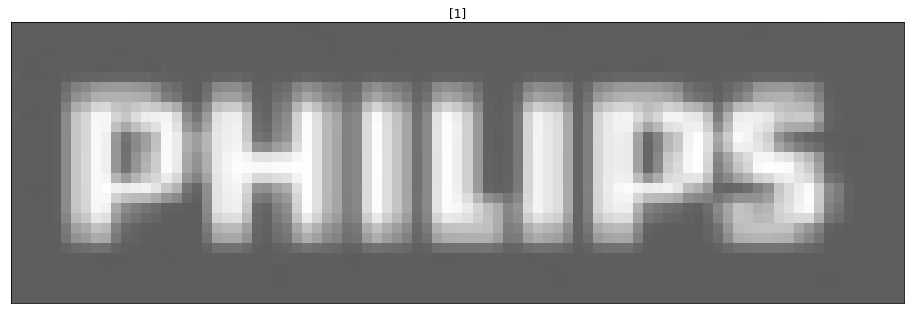

PHILIPS

./comma_won/mini4435111018_L300.jpeg


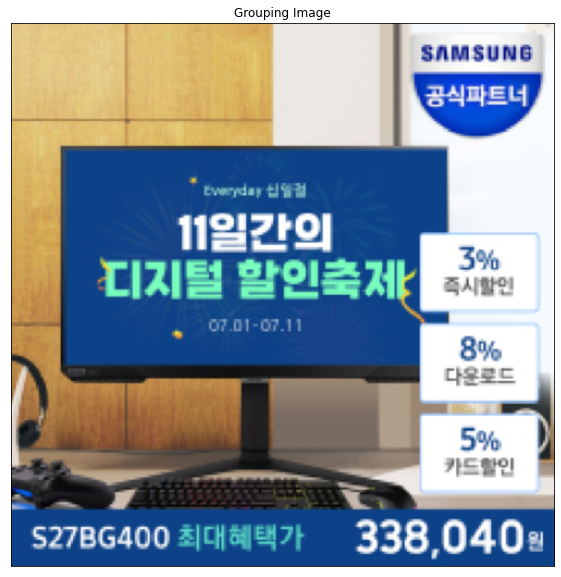

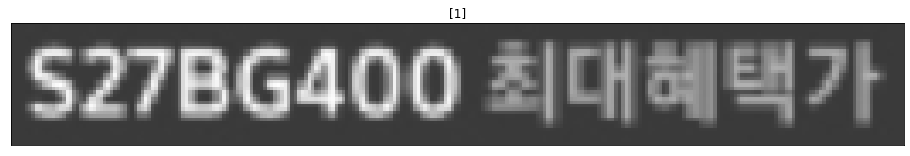

S27BG400 최 대 혜 택 가



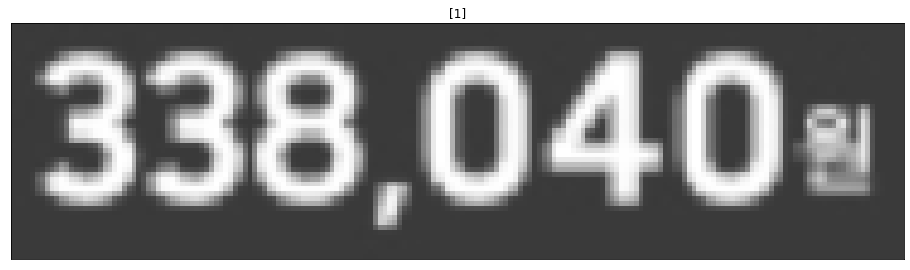

338,040:



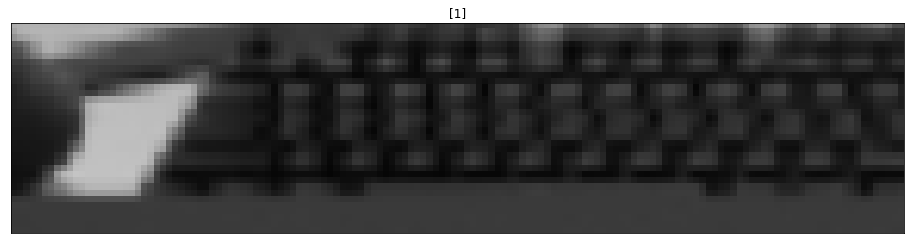

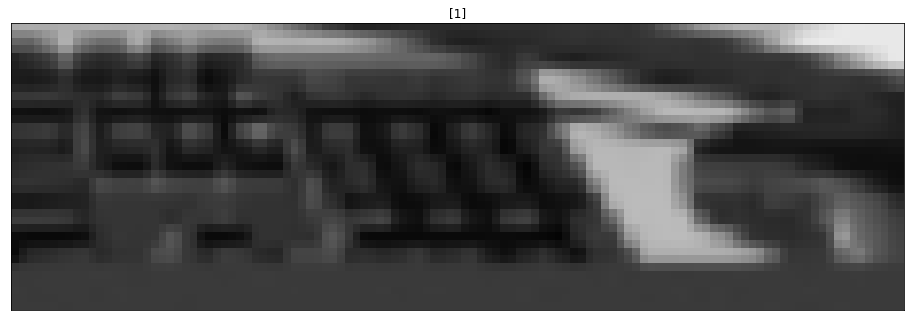

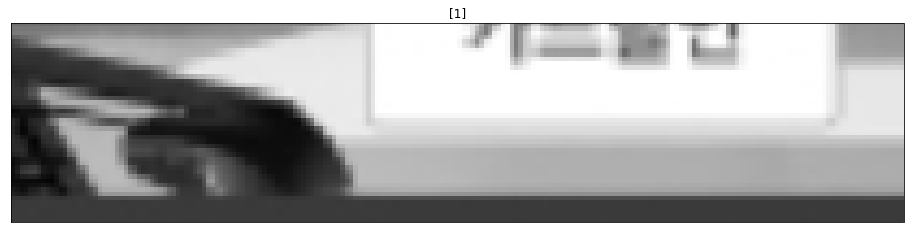

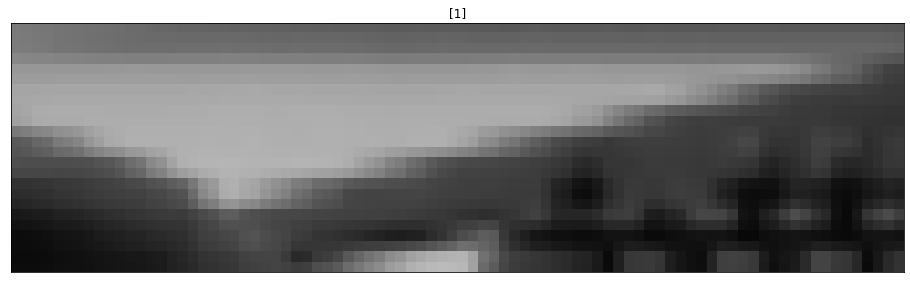

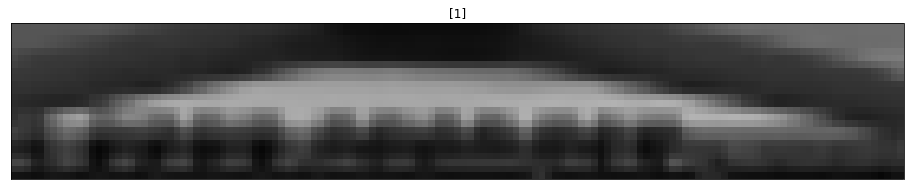

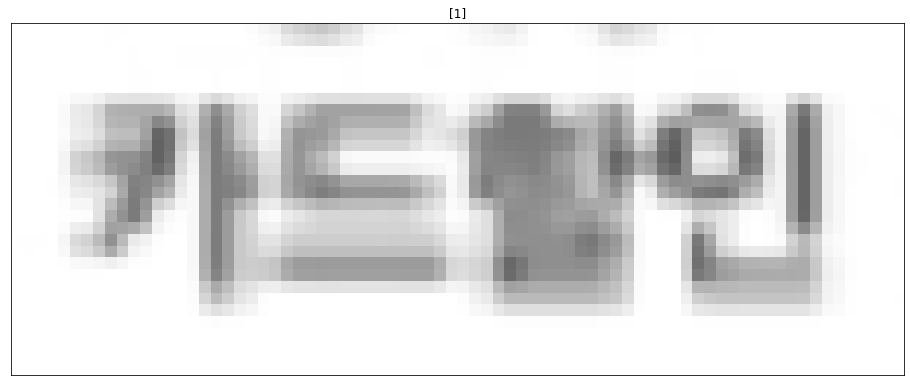

카 드 할 인



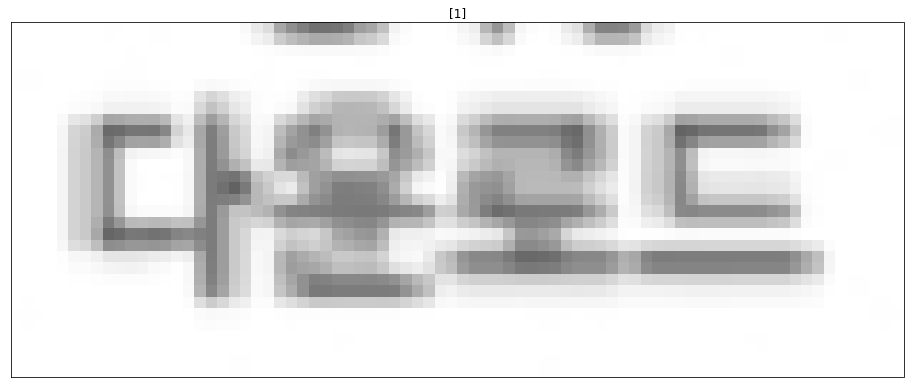

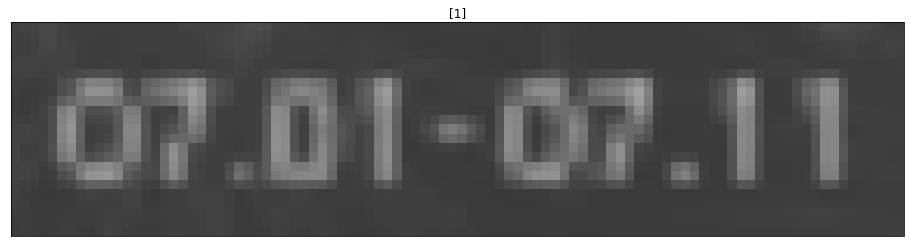

O7.01-07.11



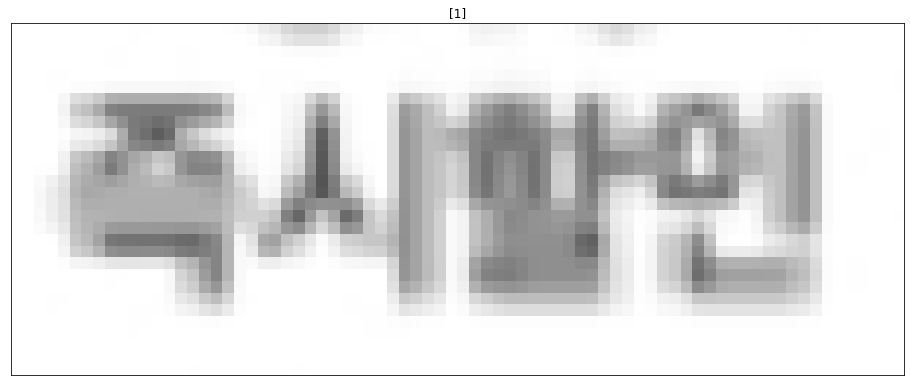

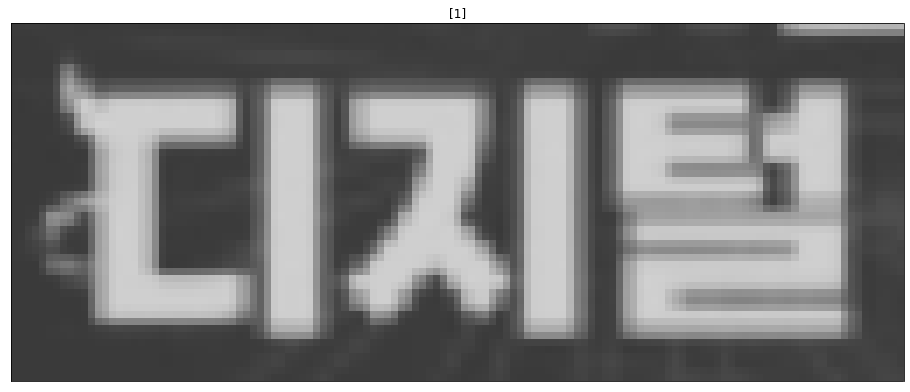

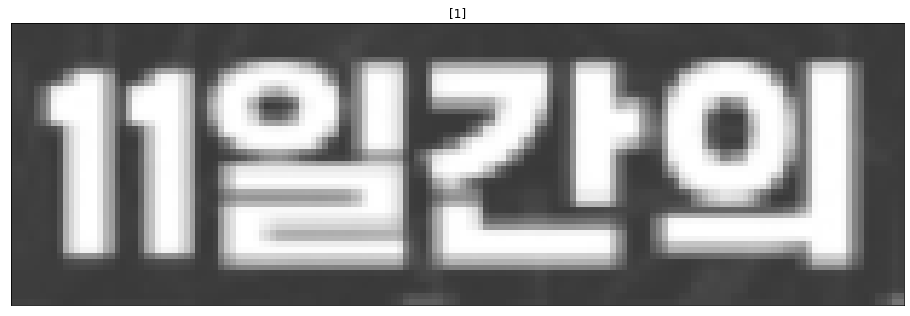

1Bzro}



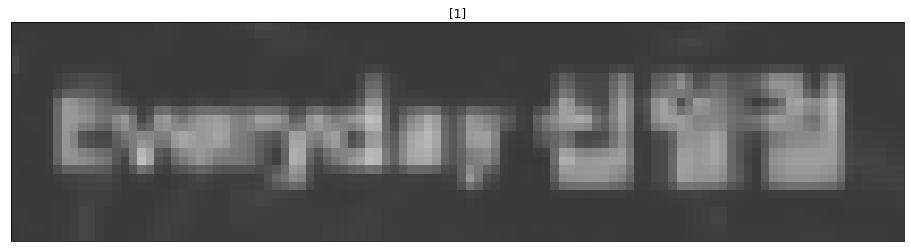

verdes UE



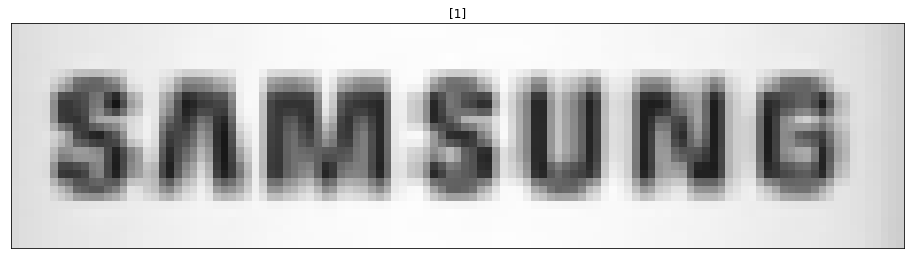


./comma_won/mini3756577521_L300.jpeg


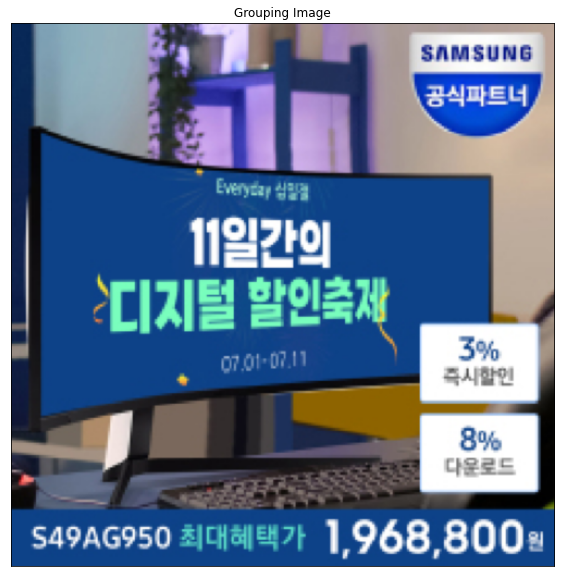

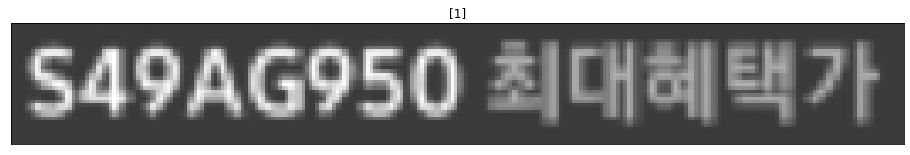

S49AG950 2) Chai E4 7}



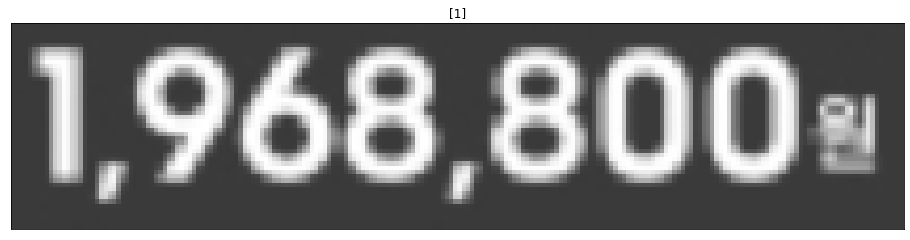

1,968,8002



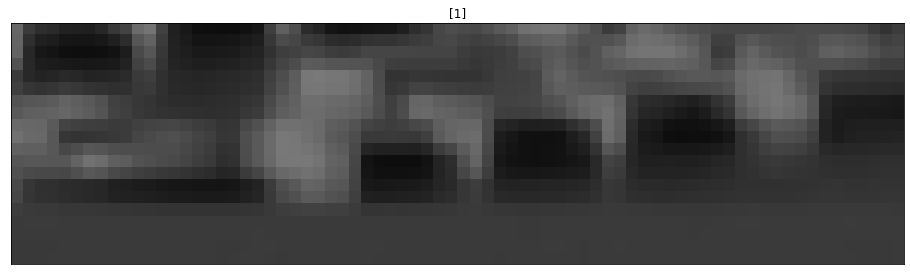

i ie ll



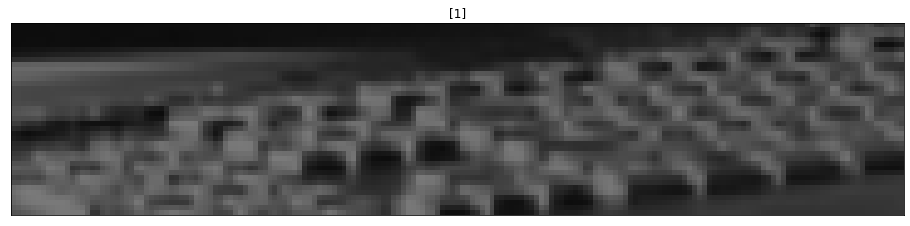

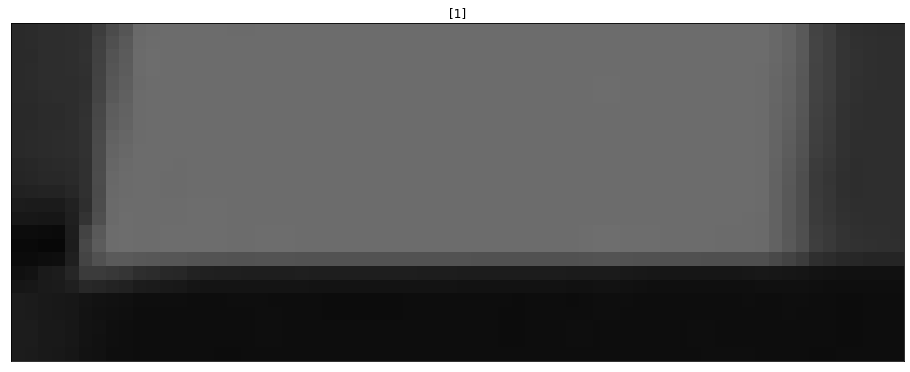

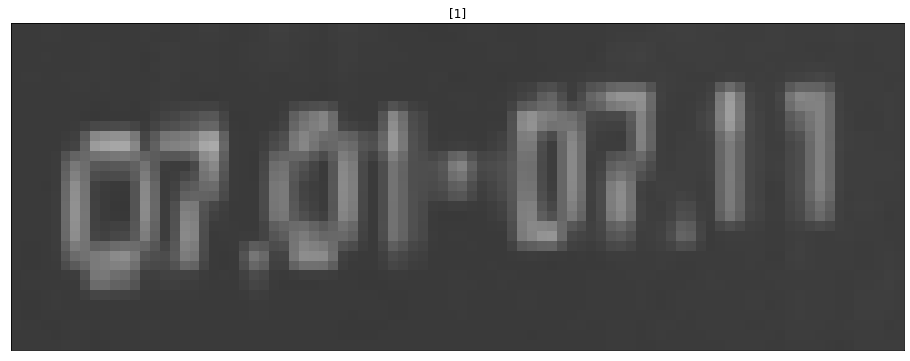

ㅁ



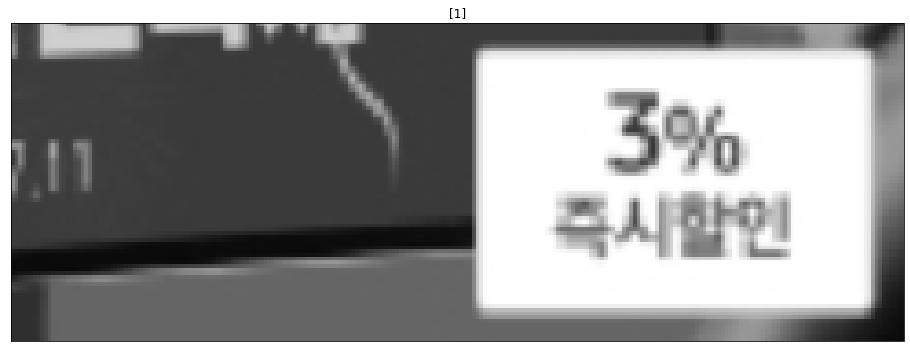

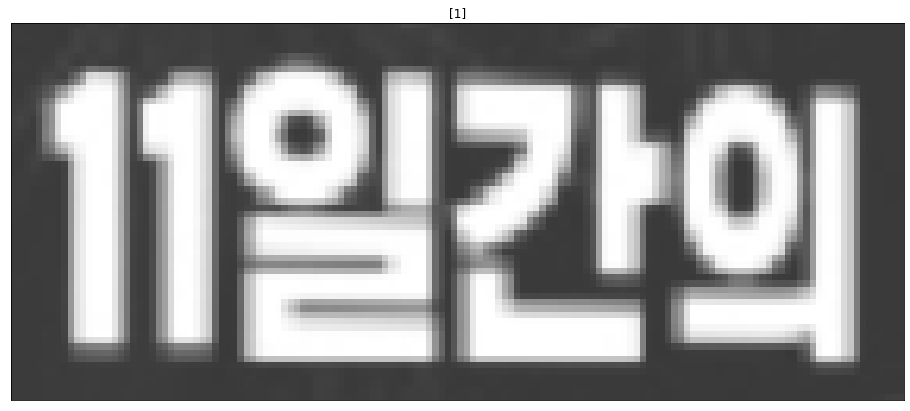

11 일 간 의



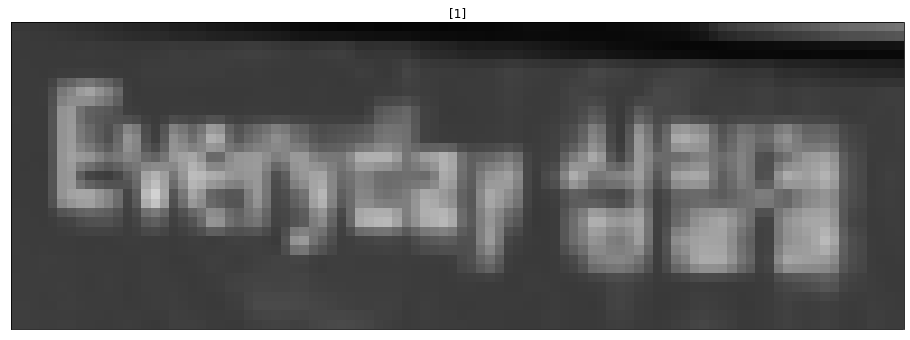

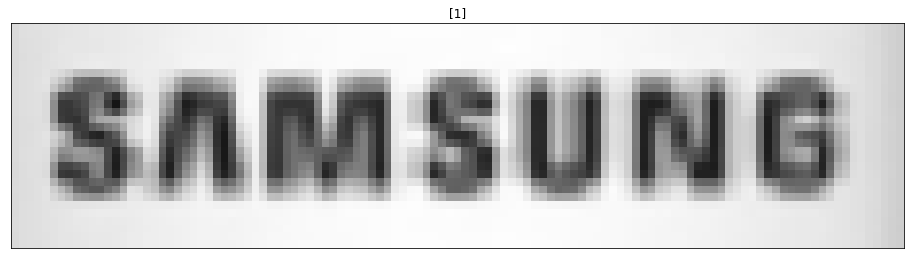


./comma_won/mini4299508896_L300.jpeg


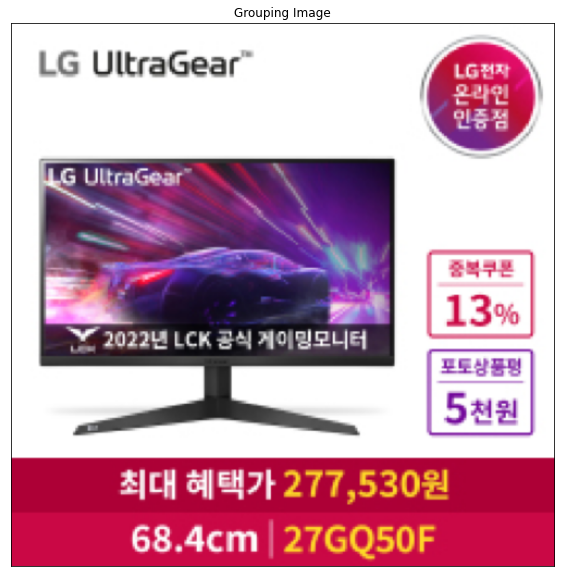

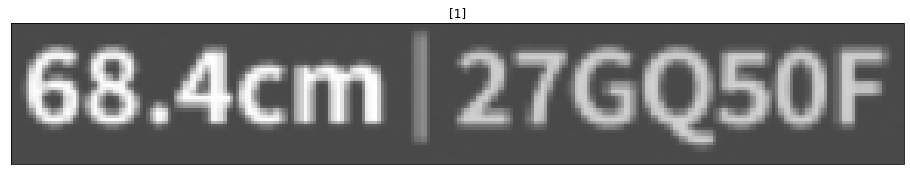

68.4cm | 27GQ50F



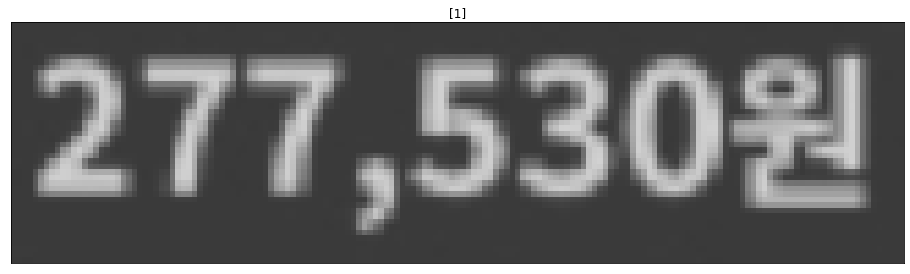

277,530H



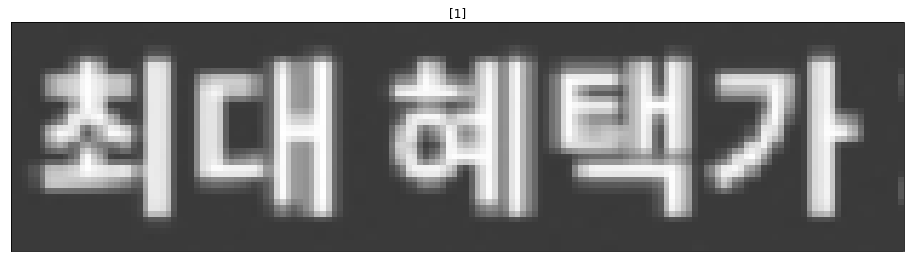

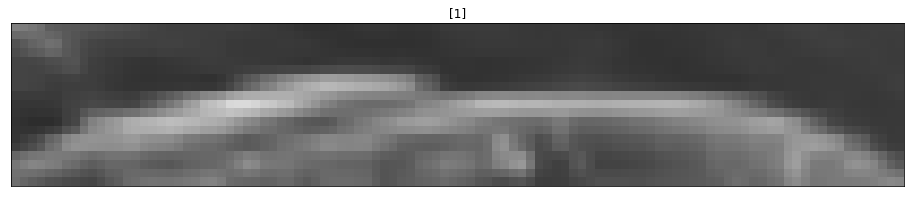

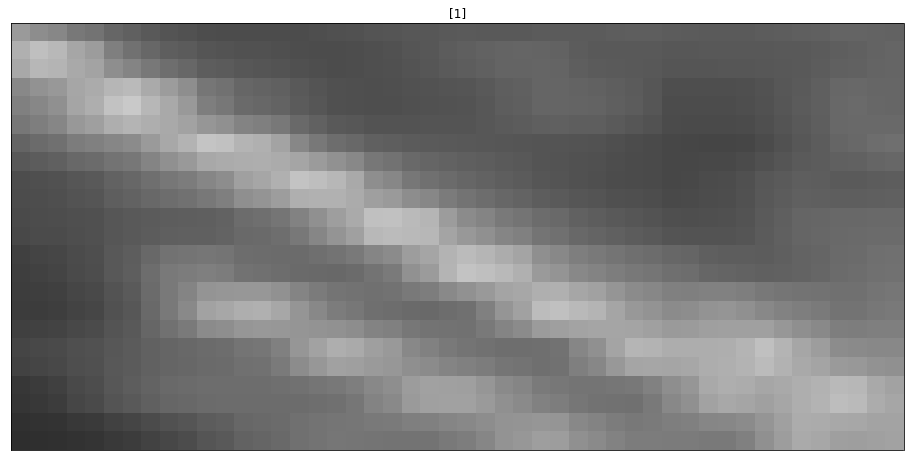

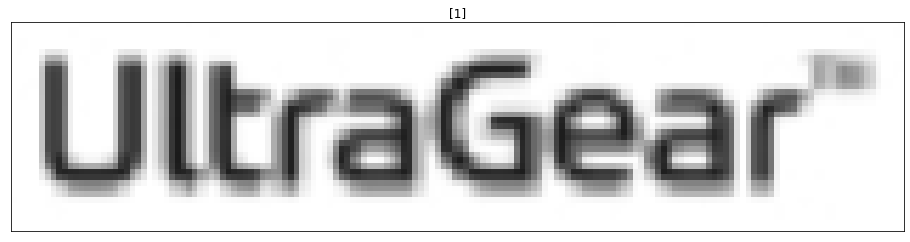

UltraGear™

./comma_won/mini3623281130_L300.jpeg


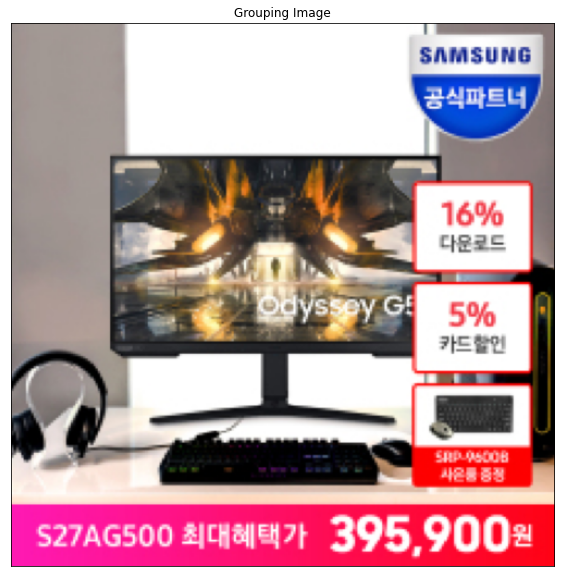

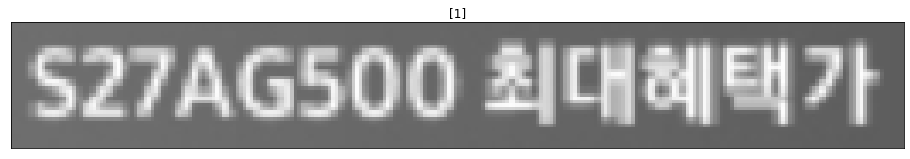

$27AG500 2|Che 7+



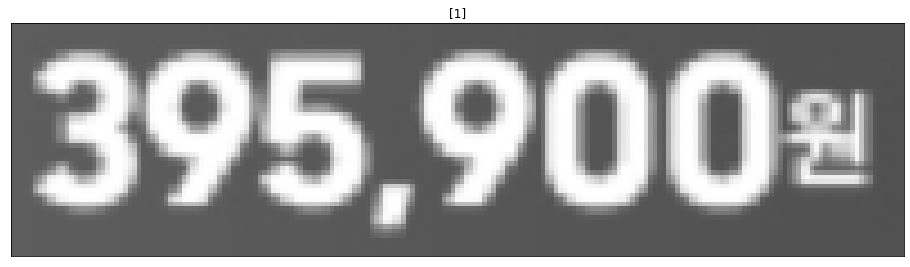

395,9002



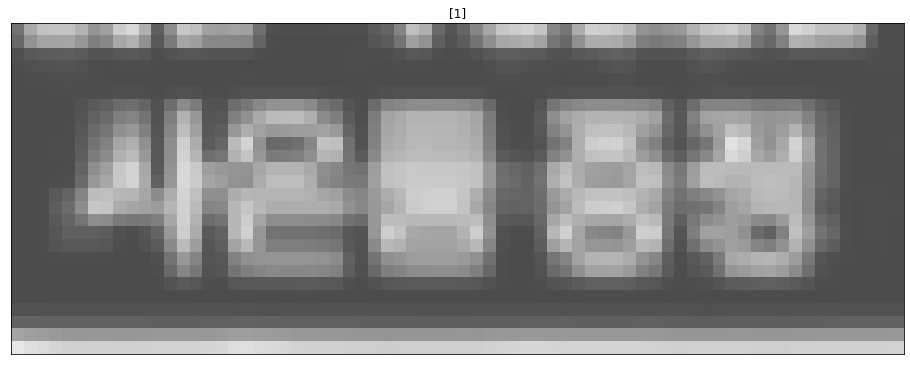


./comma_won/mini4063991459_L300.jpeg


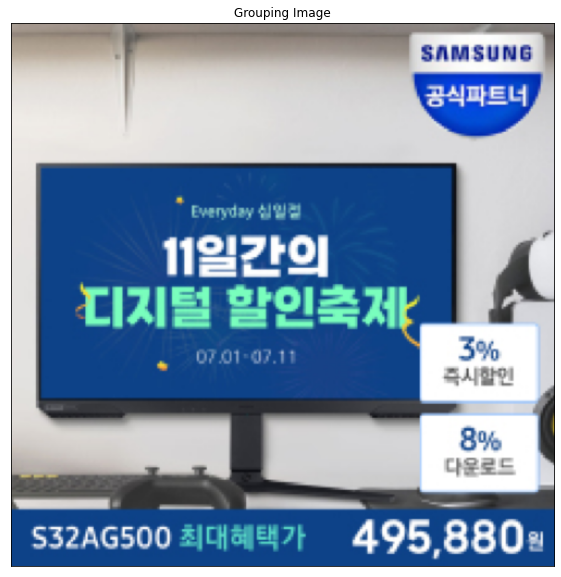

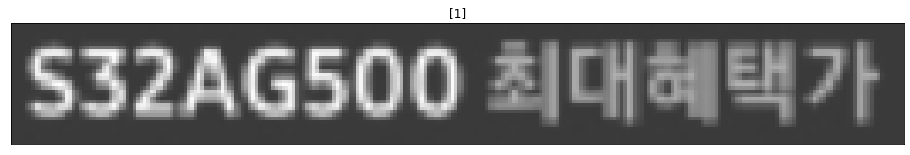

S32AG500 2) Ch agE4 7}



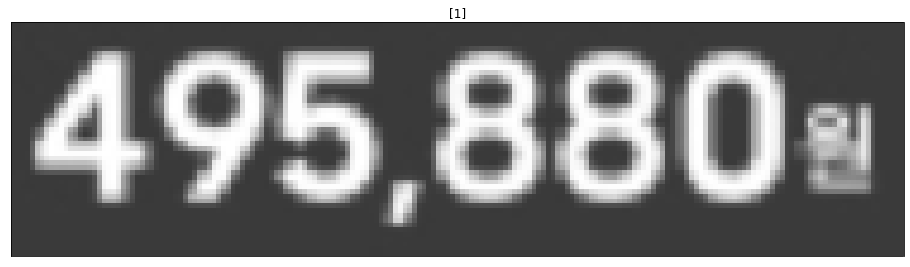

495,880s



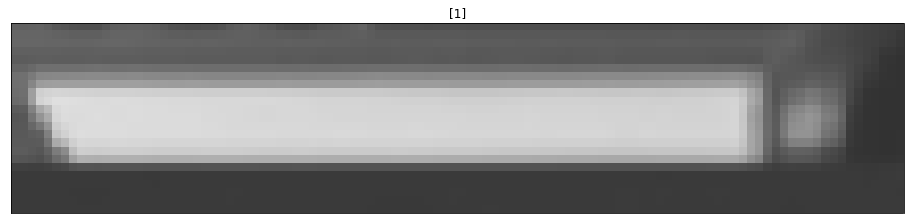

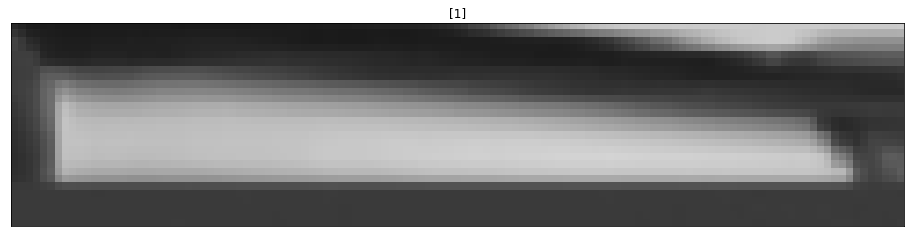

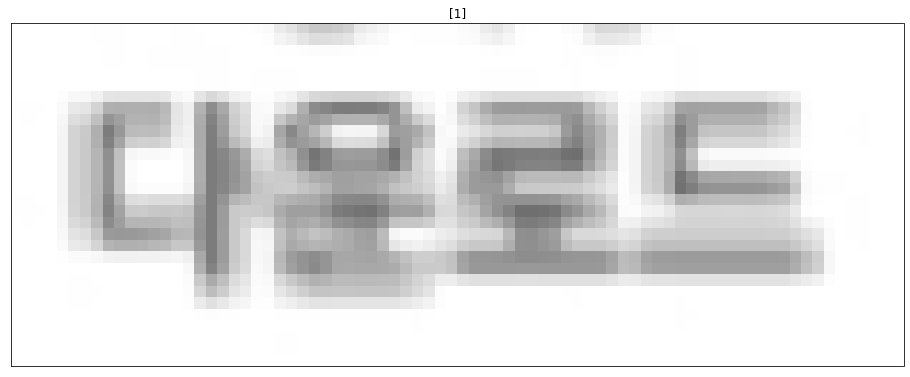

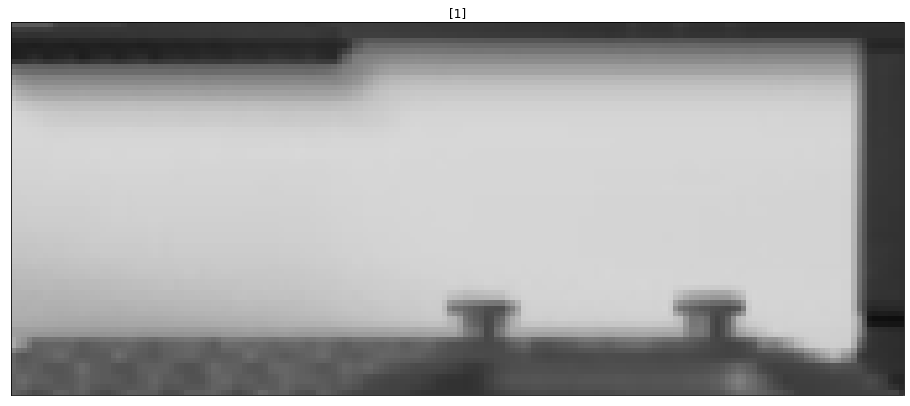

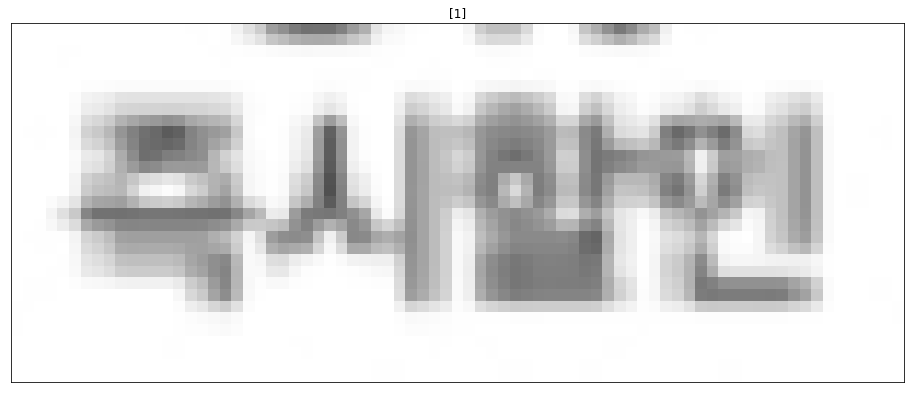

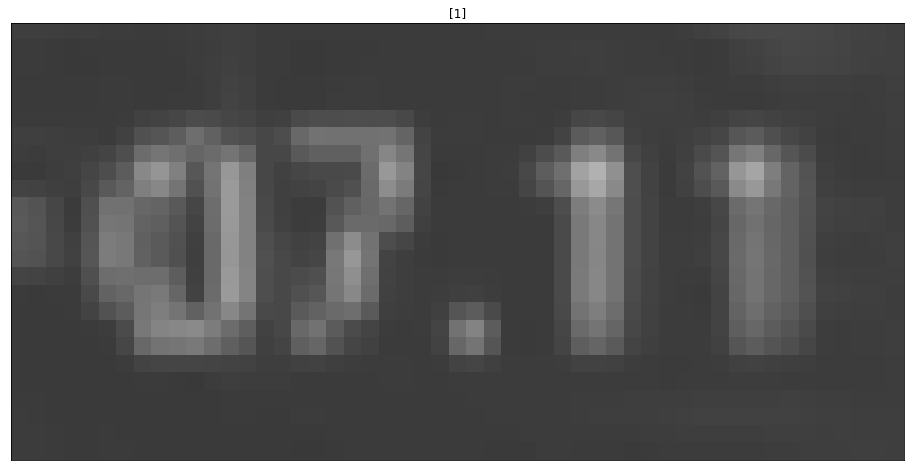

“07.11



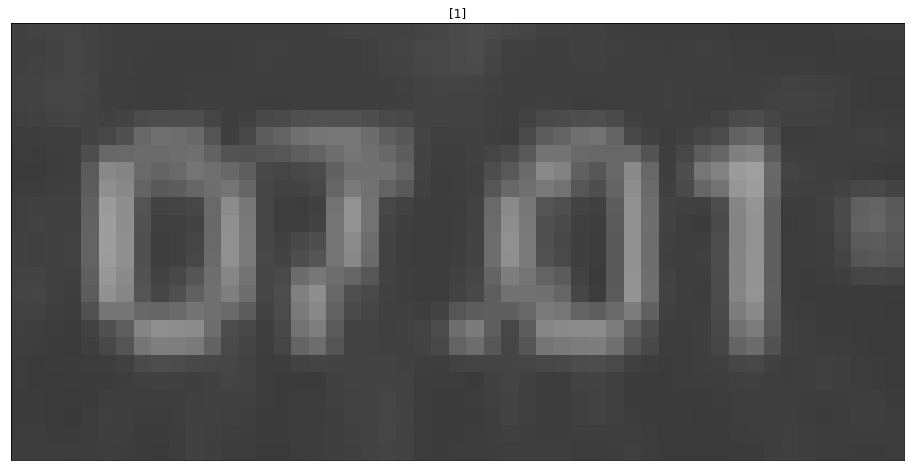

0001



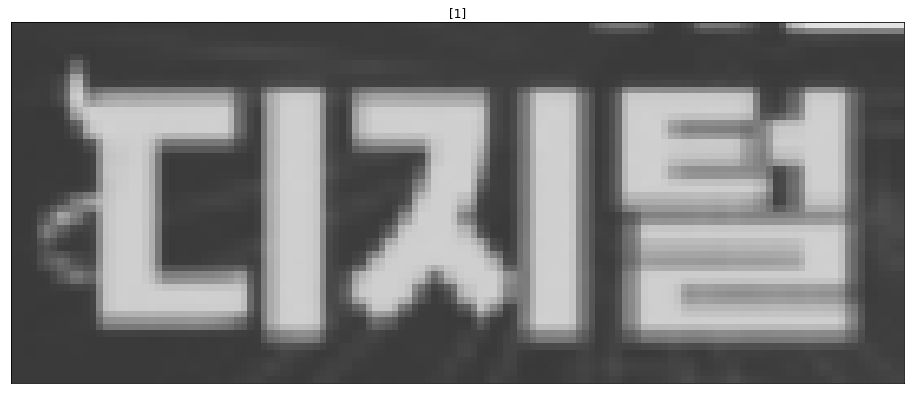

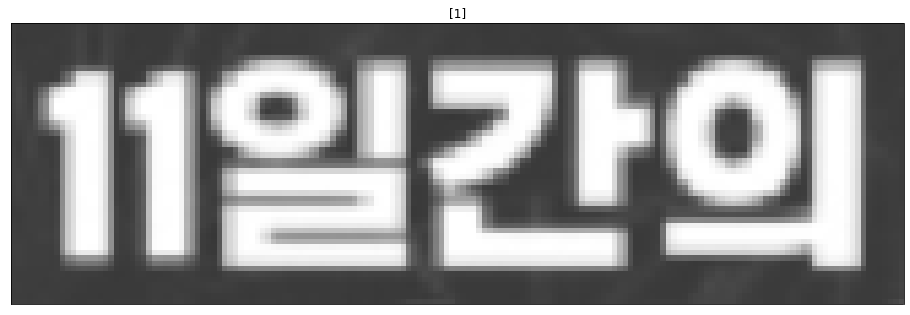

11 일 간 의



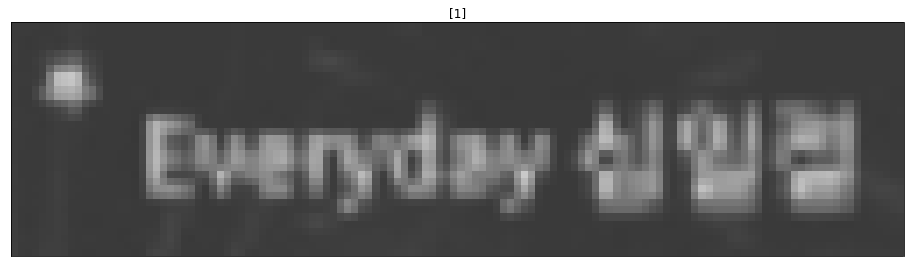

” Everyday 쉬 밀 질



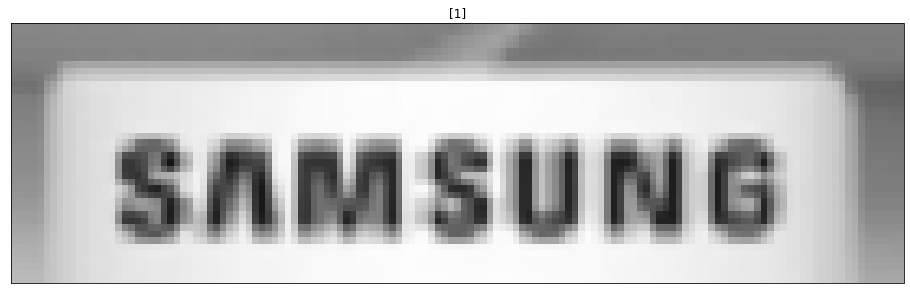

“samsune |

./comma_won/mini3955287817_L300.jpeg


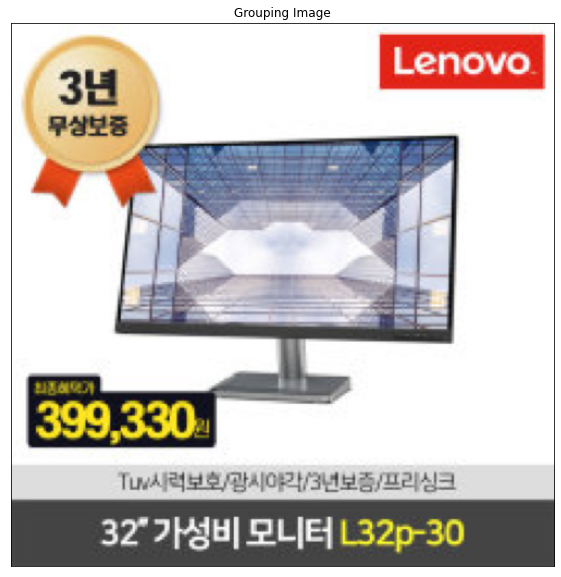

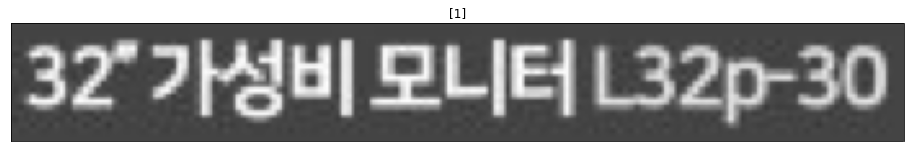

32" 가 성비 SLE] L32p-30



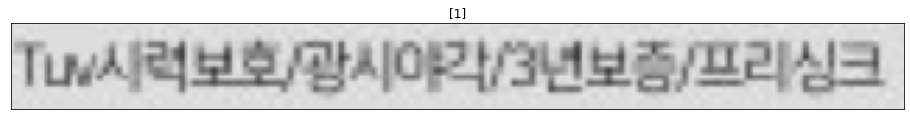

74/ 시 력 보 초 / 광 시 야 각 /3 년 보 즘 / 프 리 심 크



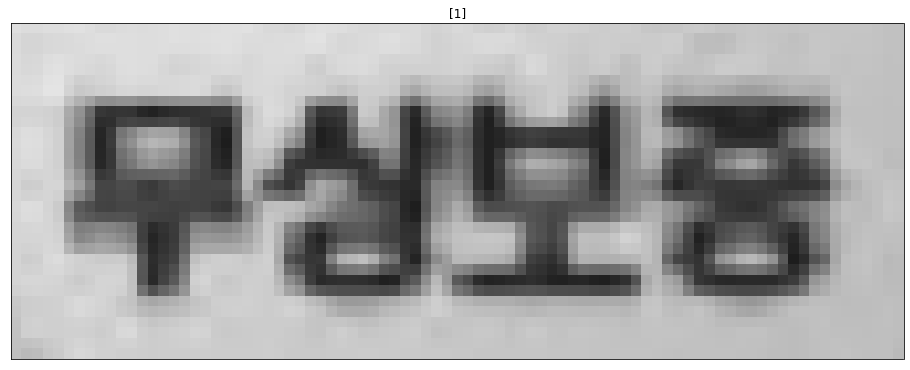

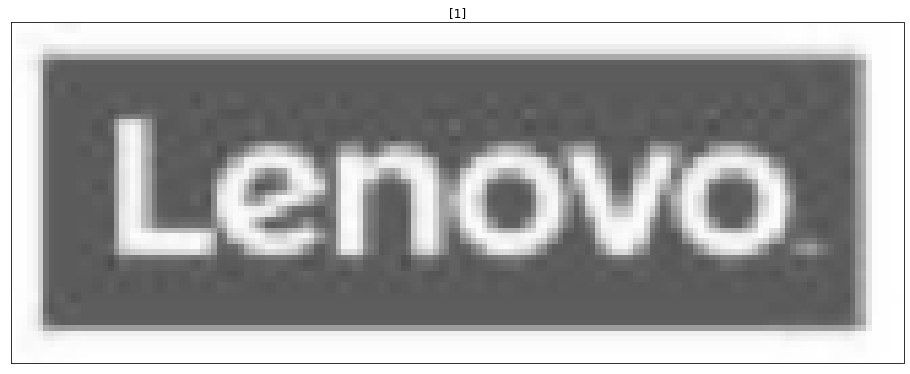


./comma_won/mini3012786691_L300.jpeg


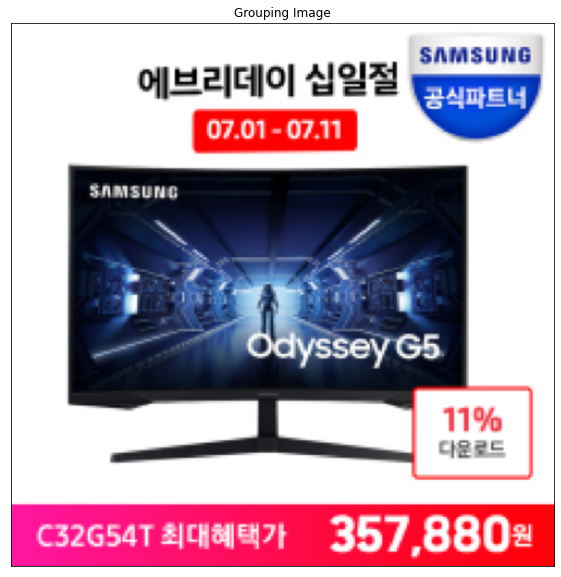

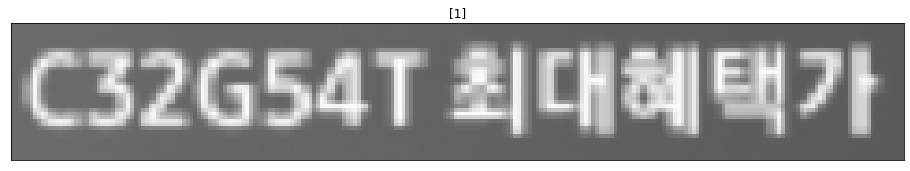

C32G54T S|Cha] 7+



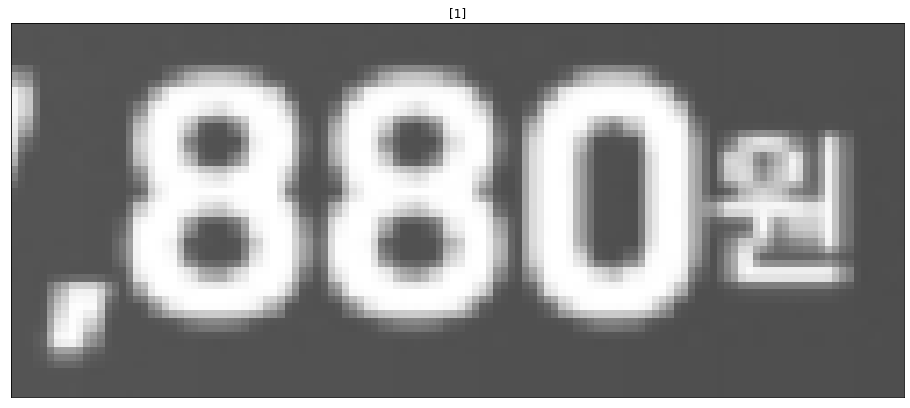

78802



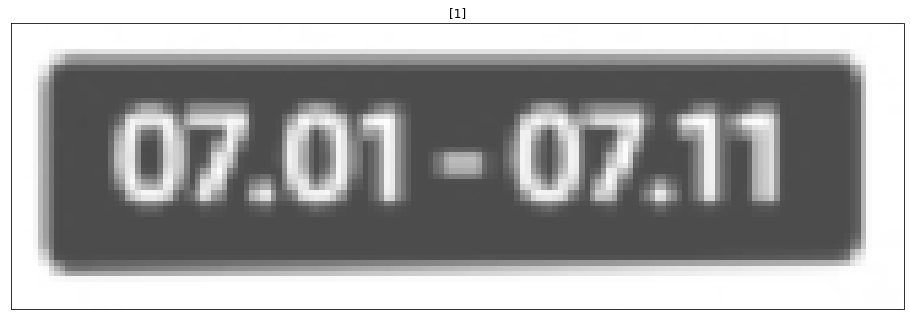

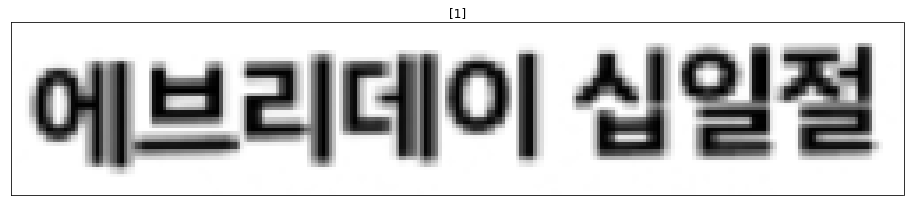

브 리 데 이 십 일 절



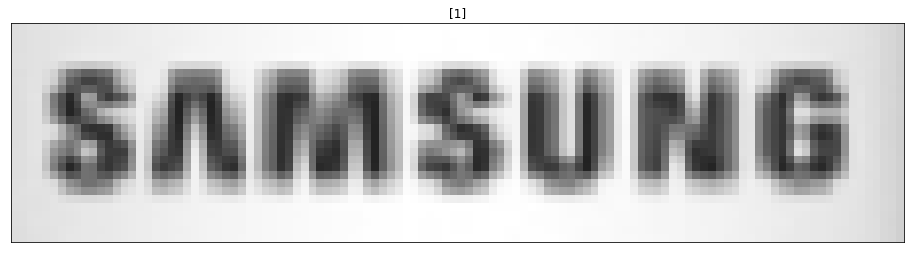

In [37]:

def tmp(img_path):
  org_image = cv2.imread(img_path)
  image = org_image.copy()
  image = imutils.resize(image, width=1000)
  ratio = org_image.shape[1] / float(image.shape[1])
  
  rgb = cv2.pyrDown(image.copy())
  small = cv2.cvtColor(rgb.copy(), cv2.COLOR_BGR2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

  grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)
  _, bw = cv2.threshold(grad, 30.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 1))
  connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
  # plt_imshow(["Grouping Image"], [grad], figsize=(16, 10))
  # plt_imshow(["Grouping Image"], [bw], figsize=(16, 10))

  cnts = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts, method="top-to-bottom")[0]
  mask = np.zeros(bw.shape, dtype=np.uint8)

  roi_list = []
  roi_title_list = []

  margin =5
  # receipt_grouping = image.copy()

  # for c in cnts:
  #   (x, y, w, h) = cv2.boundingRect(c)
  #   ar = w // float(h)

  #   if ar > 3.0 and ar < 6.5 and (W/2) < x:
  #     color = (0, 255, 0)
  #     roi = image[y - margin:y + h + margin, x - margin:x + w + margin]
  #     roi_list.append(roi)
  #     roi_title_list.append("Roi_{}".format(len(roi_list)))
  #   else:
  #     color = (0, 0, 255)

  #   cv2.rectangle(receipt_grouping, (x - margin, y - margin), (x + w + margin, y + h + margin), color, 2)
  #   cv2.putText(receipt_grouping, "".join(str(ar)), (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.65, color, 2)
  
  plt_imshow(["Grouping Image"], [connected], figsize=(16, 10)) if show_contours else None
  contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    
    if r > 0.45 and w > 8 and h > 8 and float(w)/float(h) > 2.5 if not show_all_contours else True:
        roi = rgb[max(0,y-margin)  :min(rgb.shape[0],y + h+margin) , max(0,x-margin) :min(rgb.shape[1],x + w+margin) ]
        
        roi_list.append(roi)
        roi_title_list.append("Roi_{}".format(len(roi_list)))
        cv2.rectangle(rgb if show_rectangle else rgb.copy(), (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
    

  plt_imshow(["Grouping Image"], [rgb], figsize=(16, 10))
  # plt_imshow([i for i in range(len(roi_list))], roi_list, figsize=(16, 10))

  # for idx, roi in enumerate(roi_list):
  #   if idx == 0:
  #     mergeImg = mergeResize(roi)
  #   else:
  #     cropImg = mergeResize(roi)
  #     mergeImg = np.concatenate((mergeImg, cropImg), axis=0)

  # threshold_mergeImg = cv2.threshold(mergeImg, 150, 255, cv2.THRESH_BINARY)[1]
  # plt_imshow(["Merge Image"], [threshold_mergeImg])
  # merge_Img_text = pytesseract.image_to_string(threshold_mergeImg, lang='kor+eng')
  # print(merge_Img_text)

  for roi in roi_list:
    gray_roi= cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blurred_roi = -cv2.GaussianBlur(gray_roi, (1,1), 0)
    # threshold_roi = cv2.threshold(blurred_roi, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    plt_imshow([1], -blurred_roi, figsize=(16, 10))
    roi_text = pytesseract.image_to_string(-blurred_roi, lang='eng+kor')
    print(roi_text)


img_regex = re.compile("jpeg|png")
target_path = './comma_won/mini'
show_rectangle = False
show_contours = False
show_all_contours = False
for file_name in os.listdir(target_path):
  if img_regex.search(file_name):
    print(target_path+file_name)
    tmp(target_path+'/'+file_name)
  